<a href="https://colab.research.google.com/github/irivelez/Big_data/blob/main/Codigo_SS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div >
<img src = "../../banner.jpg" />
</div>

# Linear Regression for Prediction

Model

$$
y= f(X) + u
$$

$$
y= X\beta + u
$$

Outcome to be predicted: $Y_i$

> *example:* a worker's log wage

Characteristics (aka **features**): $X_i=\left(X_{1i},\ldots,X_{pi}\right)'$

> *example:* education, age, state of birth, parents' education, cognitive ability, family background


In [ ]:
# Install packages
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Load Packages
require("pacman")
p_load("tidyverse","stargazer")


Loading required package: pacman

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


stargazer installed



In [ ]:
nlsy = read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')

nlsy = nlsy  %>%   drop_na(educ) #dropea los valores faltantes (NA)

Rows: 1266 Columns: 994
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (994): lnw_2016, educ, black, hispanic, other, exp, afqt, mom_educ, dad_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(nlsy)

lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,⋯,_XPexp_13,_XPexp_14,_XPexp_16,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.076898,16,0,0,0,11,7.0724,12,12,3,⋯,0,0,0,0,0,0,0,0,0,0
3.294138,9,0,0,0,19,4.7481,9,10,2,⋯,0,0,0,0,0,1,0,0,0,0
2.830896,9,0,1,0,22,1.1987,12,9,3,⋯,0,0,0,0,0,0,0,0,1,0
4.306459,16,0,0,0,13,8.9321,16,18,2,⋯,1,0,0,0,0,0,0,0,0,0
5.991465,16,0,1,0,15,2.2618,16,16,1,⋯,0,0,0,0,0,0,0,0,0,0
4.711924,16,0,0,0,14,8.9502,18,20,1,⋯,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Polinomios de educación

nlsy <- nlsy  %>% mutate(educ2=educ^2,
                         educ3=educ^3,
                         educ4=educ^4,
                         educ5=educ^5,
                         educ6=educ^6,
                         educ7=educ^7,
                         educ8=educ^8,
                         educ9=educ^9,
                         educ10=educ^10
                        )

In [ ]:
head(nlsy)

lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,⋯,_XPexp_23,educ2,educ3,educ4,educ5,educ6,educ7,educ8,educ9,educ10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.076898,16,0,0,0,11,7.0724,12,12,3,⋯,0,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12
3.294138,9,0,0,0,19,4.7481,9,10,2,⋯,0,81,729,6561,59049,531441,4782969,43046721,387420489,3.486784e+09
2.830896,9,0,1,0,22,1.1987,12,9,3,⋯,0,81,729,6561,59049,531441,4782969,43046721,387420489,3.486784e+09
4.306459,16,0,0,0,13,8.9321,16,18,2,⋯,0,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12
5.991465,16,0,1,0,15,2.2618,16,16,1,⋯,0,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12
4.711924,16,0,0,0,14,8.9502,18,20,1,⋯,0,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12


In [ ]:
# Regresion lineal Salario en polinomios de educación
# reg lnw_2016 educ-educ10 #Stata
reg<- lm(lnw_2016~educ+ educ2 + educ3 + educ4 + educ5 + educ6 + educ7 +
    educ8 + educ9 + educ10,   data = nlsy)

#reg <- lm(lnw_2016 ~ educ +I(educ^2)  +I(educ^3)  +I(educ^4)  +I(educ^5)  +I(educ^6)  +I(educ^7)
#  +I(educ^8)  +I(educ^9)  +I(educ^10),   data = nlsy) #hacer los polinomios sin crear las variables (otra opción)
reg0<- lm(lnw_2016~educ,   data = nlsy)

In [ ]:
summary(reg) #ver los resultados


Call:
lm(formula = lnw_2016 ~ educ + educ2 + educ3 + educ4 + educ5 + 
    educ6 + educ7 + educ8 + educ9 + educ10, data = nlsy)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9297 -0.4005 -0.0368  0.3649  4.4115 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.082e+04  1.958e+04  -0.552    0.581
educ         7.189e+03  1.362e+04   0.528    0.598
educ2       -2.075e+03  4.144e+03  -0.501    0.617
educ3        3.411e+02  7.231e+02   0.472    0.637
educ4       -3.511e+01  7.953e+01  -0.441    0.659
educ5        2.334e+00  5.691e+00   0.410    0.682
educ6       -9.912e-02  2.621e-01  -0.378    0.705
educ7        2.519e-03  7.275e-03   0.346    0.729
educ8       -3.090e-05  9.832e-05  -0.314    0.753
educ9               NA         NA      NA       NA
educ10       2.774e-09  1.100e-08   0.252    0.801

Residual standard error: 0.8391 on 1256 degrees of freedom
Multiple R-squared:  0.07473,	Adjusted R-squared: 

In [ ]:
stargazer(reg,reg0,type="text") #Equivalente en stata: outreg2


                                   Dependent variable:               
                    -------------------------------------------------
                                        lnw_2016                     
                              (1)                      (2)           
---------------------------------------------------------------------
educ                       7,189.043                 0.077***        
                          (13,620.270)               (0.008)         
                                                                     
educ2                      -2,075.162                                
                          (4,144.199)                                
                                                                     
educ3                       341.132                                  
                           (723.058)                                 
                                                                     
educ4              

## Predicción

$$
\hat{y} = \hat{\beta}_0 +  \hat{\beta}_1 educ + .... +  \hat{\beta}_{10} educ10
$$

In [ ]:
#predict me simplifica hacer la operacion X\hat{\beta}

nlsy$yhat = predict(reg) #R base
#nsly <- nsly  %>% mutate(yhat=predict(reg)) #con el paquete mutate

In [ ]:
head(nlsy)

lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,⋯,educ2,educ3,educ4,educ5,educ6,educ7,educ8,educ9,educ10,yhat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.076898,16,0,0,0,11,7.0724,12,12,3,⋯,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12,3.310792
3.294138,9,0,0,0,19,4.7481,9,10,2,⋯,81,729,6561,59049,531441,4782969,43046721,387420489,3.486784e+09,2.667921
2.830896,9,0,1,0,22,1.1987,12,9,3,⋯,81,729,6561,59049,531441,4782969,43046721,387420489,3.486784e+09,2.667921
4.306459,16,0,0,0,13,8.9321,16,18,2,⋯,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12,3.310792
5.991465,16,0,1,0,15,2.2618,16,16,1,⋯,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12,3.310792
4.711924,16,0,0,0,14,8.9502,18,20,1,⋯,256,4096,65536,1048576,16777216,268435456,4294967296,68719476736,1.099512e+12,3.310792


In [ ]:
# Voy a calcular E(y|X=x) y E(\hat(y)| X=x)
# plot predicted values
summ = nlsy %>%
  group_by(
    educ, educ2, educ3, educ4, educ5,
    educ6, educ7, educ8, educ9, educ10
  ) %>%
  summarize(
    mean_y = mean(lnw_2016),
    yhat_reg = mean(yhat), .groups="drop"
  )

In [ ]:
head(summ)

educ,educ2,educ3,educ4,educ5,educ6,educ7,educ8,educ9,educ10,mean_y,yhat_reg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,64,512,4096,32768,262144,2097152,16777216,134217728,1073741824,2.893439,2.891490
9,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401,2.660140,2.667921
10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000,2.592467,2.584776
11,121,1331,14641,161051,1771561,19487171,214358881,2357947691,25937424601,2.862028,2.831769
12,144,1728,20736,248832,2985984,35831808,429981696,5159780352,61917364224,2.948959,2.974296
13,169,2197,28561,371293,4826809,62748517,815730721,10604499373,137858491849,3.080338,2.960614


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


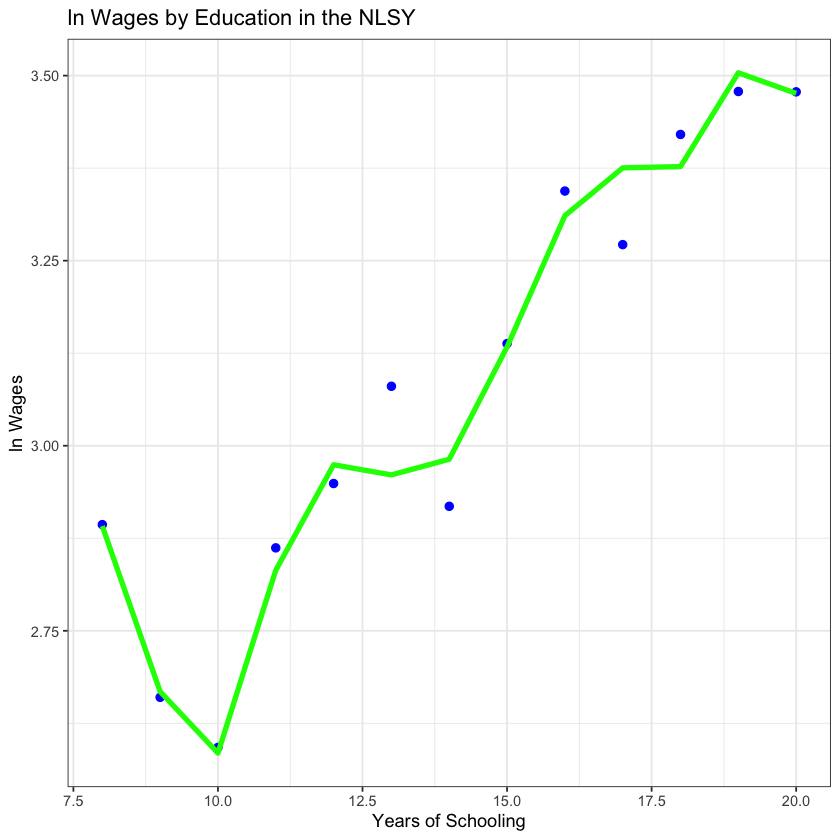

In [ ]:

ggplot(summ) +
  geom_point(
    aes(x = educ, y = mean_y),
    color = "blue", size = 2
  ) +
  geom_line(
    aes(x = educ, y = yhat_reg),
    color = "green", size = 1.5
  ) +
  labs(
    title = "ln Wages by Education in the NLSY",
    x = "Years of Schooling",
    y = "ln Wages"
  ) +
  theme_bw()


As we can see, least squares linear regression can approximate any continuous function and can certainly be used for prediction. Include a rich enough set of transformations, and OLS predictions will yield unbiased estimates of the true ideal predictor, the conditional expectation function. But these estimates will be quite noisy.

# Example 2


Two Models

 (1) $y=\beta_1 X_1 + u_1 $

 (2) $y=\beta_1 X_1 + \beta_2 X_2 + u_2$

 If model (1) is true then estimating the larger model (2) leads to inefficient though unbiased estimators due to unnecessarily including $X_2$.

If model (2) holds, estimating the smaller model (1) leads to a more efficient but biased estimate if $X_1$ is also correlated with the omitted regressor $X_2$.


## Case 1

Let's show this: Suppose Model (1) is True, i.e. wage depends only on schooling but not ability

In [ ]:
p_load("fabricatr")

#for reproducibility
set.seed(101010)


db1 <- fabricate(
  N = 100000,
  ability=rnorm(N,mean=.5,sd=2),
  schooling = round(runif(N, 2, 14)),
  logwage =rnorm(N, mean=7+.15*schooling, sd=20)
)

In [ ]:
head(db1)

,ID,ability,schooling,logwage
,<chr>,<dbl>,<dbl>,<dbl>
1,00001,-1.3284949,9,45.212609
2,00002,-2.0472302,4,18.422567
3,00003,-1.1985696,13,2.945070
4,00004,4.7268511,4,24.073468
5,00005,1.3459891,12,9.319559
6,00006,0.9971236,10,5.879960


In [ ]:
reg1<-lm(logwage~schooling,db1)

reg2<-lm(logwage~schooling+ability,db1)

stargazer(reg1,reg2,type="text")


                                    Dependent variable:                
                    ---------------------------------------------------
                                          logwage                      
                               (1)                       (2)           
-----------------------------------------------------------------------
schooling                   0.175***                  0.175***         
                             (0.018)                   (0.018)         
                                                                       
ability                                                -0.018          
                                                       (0.032)         
                                                                       
Constant                    6.829***                  6.838***         
                             (0.158)                   (0.159)         
                                                               

In [ ]:
db1<- db1 %>% mutate(yhat_reg1=predict(reg1),
                     yhat_reg2=predict(reg2))


In [ ]:
var(db1$yhat_reg1)


[1] 0.3710377

In [ ]:
var(db1$yhat_reg2)

[1] 0.3723009

Estimating the larger model (2) leads to inefficient though unbiased estimators due to unnecessarily including $X_2$.

## Case 2

Now suppose Model (2) is True, i.e. wage depends on schooling AND ability, and they are correlated

In [ ]:
db2 <- fabricate(
  N = 100000,
  ability=rnorm(N,mean=.5,sd=2),
  schooling = round(runif(N, 2, 14)),
  schooling = round(ceiling(schooling+1*ability)), #educacion es aumentada por la habilidad
  logwage =rnorm(N, mean=7+.15*schooling+.25*ability, sd=20) #salario depende de educacion y habilidad
)

In [ ]:
head(db2)

,ID,ability,schooling,logwage
,<chr>,<dbl>,<dbl>,<dbl>
1,00001,-1.33074991,4,14.217687
2,00002,-0.08190473,8,17.724687
3,00003,2.93434878,17,33.349840
4,00004,2.69727763,12,13.700272
5,00005,2.30242655,9,35.650034
6,00006,2.83305535,8,7.594834


In [ ]:
reg3<-lm(logwage~schooling,db2)

reg4<-lm(logwage~schooling+ability,db2)

stargazer(reg3,reg4,type="text")


                                     Dependent variable:                 
                    -----------------------------------------------------
                                           logwage                       
                               (1)                        (2)            
-------------------------------------------------------------------------
schooling                    0.254***                   0.179***         
                             (0.016)                    (0.018)          
                                                                         
ability                                                 0.300***         
                                                        (0.036)          
                                                                         
Constant                     6.158***                   6.675***         
                             (0.154)                    (0.167)          
                                     

In [ ]:
db2$yhat_reg3<-predict(reg3)

db2$yhat_reg4<-predict(reg4)


In [ ]:
var(db2$yhat_reg3)


[1] 1.050133

In [ ]:
var(db2$yhat_reg4)

[1] 1.320984

Estimating the smaller model (1) leads to a more efficient but biased estimate when $X_1$ is also correlated with the omitted regressor $X_2$.